### This is a simple notebook to build and visualize the kNN algorithm.

It accompanies Chapter 2 of the book.

Copyright: Viviana Acquaviva (2023)

License: [BSD-3-clause](https://opensource.org/license/bsd-3-clause/)

2025-0607 PP: fixes error in the plots and got the figures similar as in the book

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd 
import sklearn
from sklearn.tree import DecisionTreeClassifier # how methods are imported 
from sklearn import metrics # this will give us access to evaluation metrics
from sklearn import neighbors # here comes the method of the day

In [2]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

### Read in data from file

In [4]:
LearningSet = pd.read_csv('data/'+'HPLearningSet.csv')

LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1) #We want to drop the first column of the file

In [5]:
#By now we know data frames

LearningSet 

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


### Let's pick the same train/test set we had in the previous exercise.

In [6]:
TrainSet =  LearningSet.iloc[:13,:] #.iloc is used to slice data frames using positional indices

TestSet = LearningSet.iloc[13:,:]

### We split the train and test sets in features and labels.

In [7]:
Xtrain = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1) #This contains stellar mass, period, and distance

Xtest = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1)  #This contains stellar mass, period, and distance

In [8]:
ytrain = TrainSet.P_HABITABLE #This contains the ground truth label, or output

ytest = TestSet.P_HABITABLE #This contains the ground truth  label, or output

### We are now ready to deploy the kNN (k Nearest Neighbor) algorithm.

It's a simple algorithm based on the idea of distance: we look for the k (an integer) objects that are closest to the one we would like to classify, and take the majority vote among the k classes of the k neighbors.

If you are wondering: what is even there to fit?

I had the same question, and found some solace in [this post](https://stats.stackexchange.com/questions/349842/why-do-we-need-to-fit-a-k-nearest-neighbors-classifier).

In [9]:
model = neighbors.KNeighborsClassifier(n_neighbors = 3)

In [10]:
model

KNeighborsClassifier(n_neighbors=3)

### For visualization purposes, let's use only the first two features to build the model.

In [11]:
Xtrain.iloc[:,:2] 

,S_MASS,P_PERIOD
0,0.86,3.601472
1,0.85,16.080661
2,1.19,7.638460
3,0.61,112.305300
4,0.98,12.992073
5,0.09,4.910000
6,0.69,4.655411
7,0.12,6.689000
8,1.12,1103.000000
9,0.81,168.811170


#### Build model by applying the ".fit" method to the training set. Then predict labels for the test set.

In [12]:
# We can chain the fit/predict process like this, or use the fit_predict method

model.fit(Xtrain.iloc[:,:2],ytrain) #this fits the model, which can then be used to predict labels for new instances

ytestpred = model.predict(Xtest.iloc[:,:2]) #this uses the fitted model to predict the labels for the 5 objects in test set

In [13]:
ytestpred, ytest.values #compare

(array([1, 0, 1, 0, 1]), array([0, 0, 1, 0, 1]))

#### Calculate accuracy on the train set and on the test set (train score and test score):

In [14]:
print(metrics.accuracy_score(ytrain, model.predict(Xtrain.iloc[:,:2]))) #This compares the true labels for the train set with the predicted labels for the train set

print(metrics.accuracy_score(ytest, model.predict(Xtest.iloc[:,:2]))) #This compares the true labels for the test set with the predicted labels for the test set
                                                                      #(same that we did above)  

0.6923076923076923
0.8


#### After fitting and predicting, we can access the k neighbors for each element in the test set like this:

In [15]:
model.kneighbors(Xtest.iloc[:,:2]) #the first element gives the distances, the second the index of each neighbor

(array([[ 0.26575741, 21.66422235, 39.72600482],
        [ 0.67412717,  2.76390862,  5.76653597],
        [ 7.28027781, 29.19416   , 47.25690512],
        [ 1.807928  ,  2.87670841,  3.5579225 ],
        [ 7.9223177 , 13.99261869, 32.05672308]]),
 array([[11, 10,  1],
        [ 4,  1,  2],
        [11, 10,  1],
        [ 2,  7,  4],
        [11, 10,  1]]))

### Let's now visualize our results, similarly to what we did for the DT.

We can use the distance of the third neighbor as the radius of the circle that encompasses neighbors.


In [16]:
for i in range(len(TestSet)): # cycle through elements of the test set
    
    print(model.kneighbors(Xtest.iloc[:,:2])[0][i,2]) # this prints out the third element of the distances vector

39.7260048163029
5.766535965914376
47.2569051246575
3.5579225
32.056723080157795


The following code draws a circle encompassing the 3 nearest neighbors for each data point.

/Users/pepo/miniconda3/envs/project_ai/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/pepo/miniconda3/envs/project_ai/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/pepo/miniconda3/envs/project_ai/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/pepo/miniconda3/envs/project_ai/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/pepo/miniconda3/envs/project_ai/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


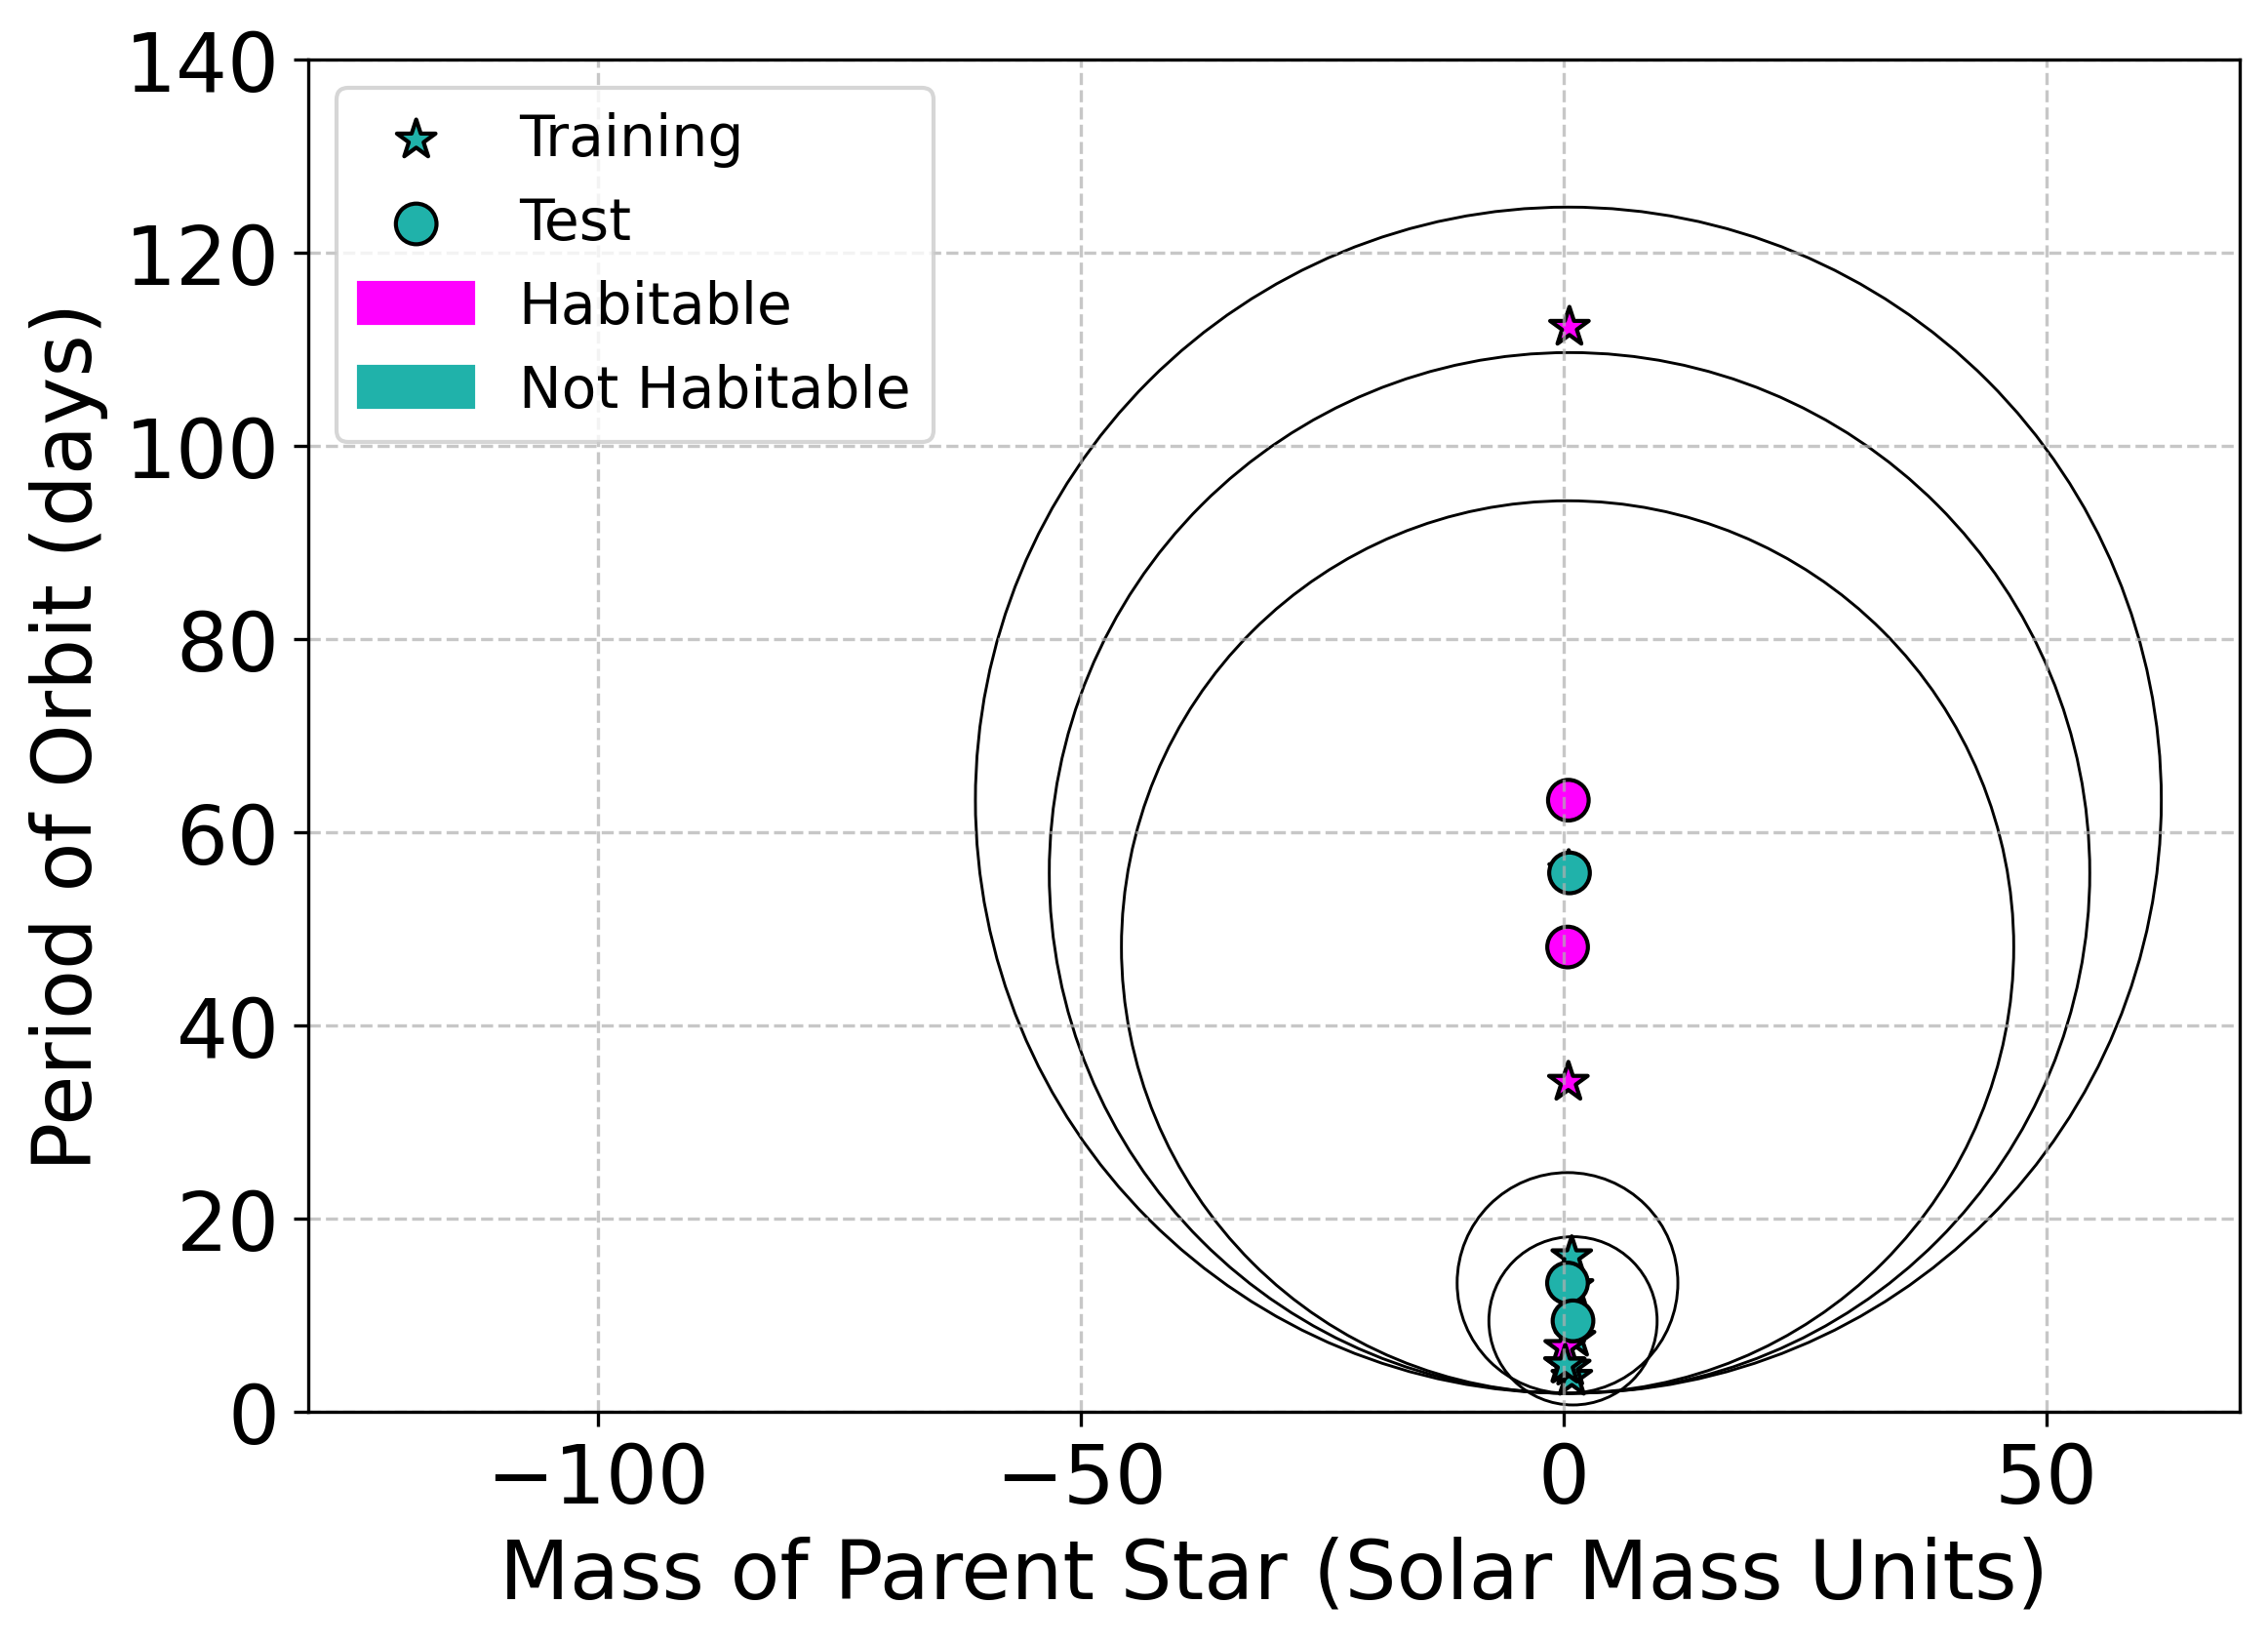

In [45]:
plt.figure(figsize=(10,6))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
a = plt.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker = '*',facecolor = 'none',\
            c = TrainSet['P_HABITABLE'], s = 100, label = 'Train', cmap=cmap) 

a.set_facecolor('none')

a = plt.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker = 'o',facecolors = 'none',\
            c = TestSet['P_HABITABLE'], s = 100, label = 'Test', cmap=cmap) 

a.set_facecolor('none')

for i in range(len(TestSet)): #plot neighbors
    circle1=plt.Circle((TestSet['S_MASS'].iloc[i],TestSet['P_PERIOD'].iloc[i]),model.kneighbors(Xtest.iloc[:,:2])[0][i,2],\
                       lw = 0.7, edgecolor='k',facecolor='none')
    plt.gca().add_artist(circle1)
    
plt.gca().set_aspect(1)

bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')
magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')

plt.legend();

ax = plt.gca()
# access the legend handles and labels
#modified: leg = ax.get_legend()
handles, labels = ax.get_legend_handles_labels()
# DEBUG: Print the handles and labels
#print("Handles:", handles)
#print("Labels:", labels)

# change the color of the handles, conform original code
#modified: leg.legendHandles[0].set_color('k')
#modified: leg.legendHandles[0].set_facecolor('none')
#modified: leg.legendHandles[1].set_color('k')
#modified: leg.legendHandles[1].set_facecolor('none')
handles[0].set_color('k')
handles[0].set_label('Training')
#handles[0].set_facecolor('none')
handles[1].set_label('Test')
handles[1].set_color('k')
#handles[1].set_facecolor('none')

#modified: plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
#           loc = 'upper left', fontsize = 14)
plt.legend(handles=[handles[0],handles[1], magentapatch, bluepatch],
           loc = 'upper left', fontsize = 14)

# PP: add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlim(-130,70)
plt.ylim(0,140)
plt.xlabel('Mass of Parent Star (Solar Mass Units)')
plt.ylabel('Period of Orbit (days)');

plt.savefig('images/HabPlanetsKNN2features.png', dpi = 300)

### Do you notice any issue here?

### If one dimension has a much bigger range than others, it will dominate the decision process. This issue can be solved by <b>scaling</b>. Scaling is a very important pre-processing step for most ML algorithms.

See some examples of different scaling algorithms [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

We will go with RobustScaler, which is more resistant to outliers than the standard version.


In [19]:
scaler = sklearn.preprocessing.RobustScaler()

In [20]:
scaler.fit(Xtrain) # important: we only scale the train set.

RobustScaler()

In [21]:
scaledXTrain = scaler.transform(Xtrain)  # note that these are now numpy arrays, not data frames

In [22]:
scaledXTrain

array([[ 0.47222222, -0.18360363, -0.33840183],
       [ 0.44444444,  0.06038761,  0.05671512],
       [ 1.38888889, -0.10467304, -0.14339694],
       [-0.22222222,  1.94175736,  1.60417741],
       [ 0.80555556,  0.        ,  0.        ],
       [-1.66666667, -0.15801948, -0.43679409],
       [ 0.        , -0.16299717, -0.31519247],
       [-1.58333333, -0.12323674, -0.38472405],
       [ 1.19444444, 21.311672  , 11.01745224],
       [ 0.33333333,  3.04655169,  2.38937206],
       [-0.52777778,  0.41352236,  0.3761471 ],
       [-0.44444444,  0.84198052,  0.66159817],
       [-1.41666667, -0.15877753, -0.40201197]])

In [23]:
scaledXtest = scaler.transform(Xtest) # note that these are now numpy arrays, not data frames

In [24]:
scaler.inverse_transform #This unscales if needed

<bound method RobustScaler.inverse_transform of RobustScaler()>

In [25]:
model.fit(scaledXTrain[:,:2],ytrain).predict(scaledXtest[:,:2])

array([1, 0, 1, 0, 1])

In [26]:
model.kneighbors(scaledXtest[:,:2])

(array([[0.2500478 , 0.53900086, 1.00570768],
        [0.47721081, 0.66005572, 0.79614695],
        [0.16494121, 0.57079985, 1.00501058],
        [0.06956397, 0.35230123, 0.38378203],
        [0.34256727, 0.35245873, 1.07701084]]),
 array([[11, 10,  1],
        [10, 12,  6],
        [11, 10,  3],
        [ 4,  0,  1],
        [11, 10, 12]]))

 ### The distances of neighbors look more balanced and give equal weight to all features:

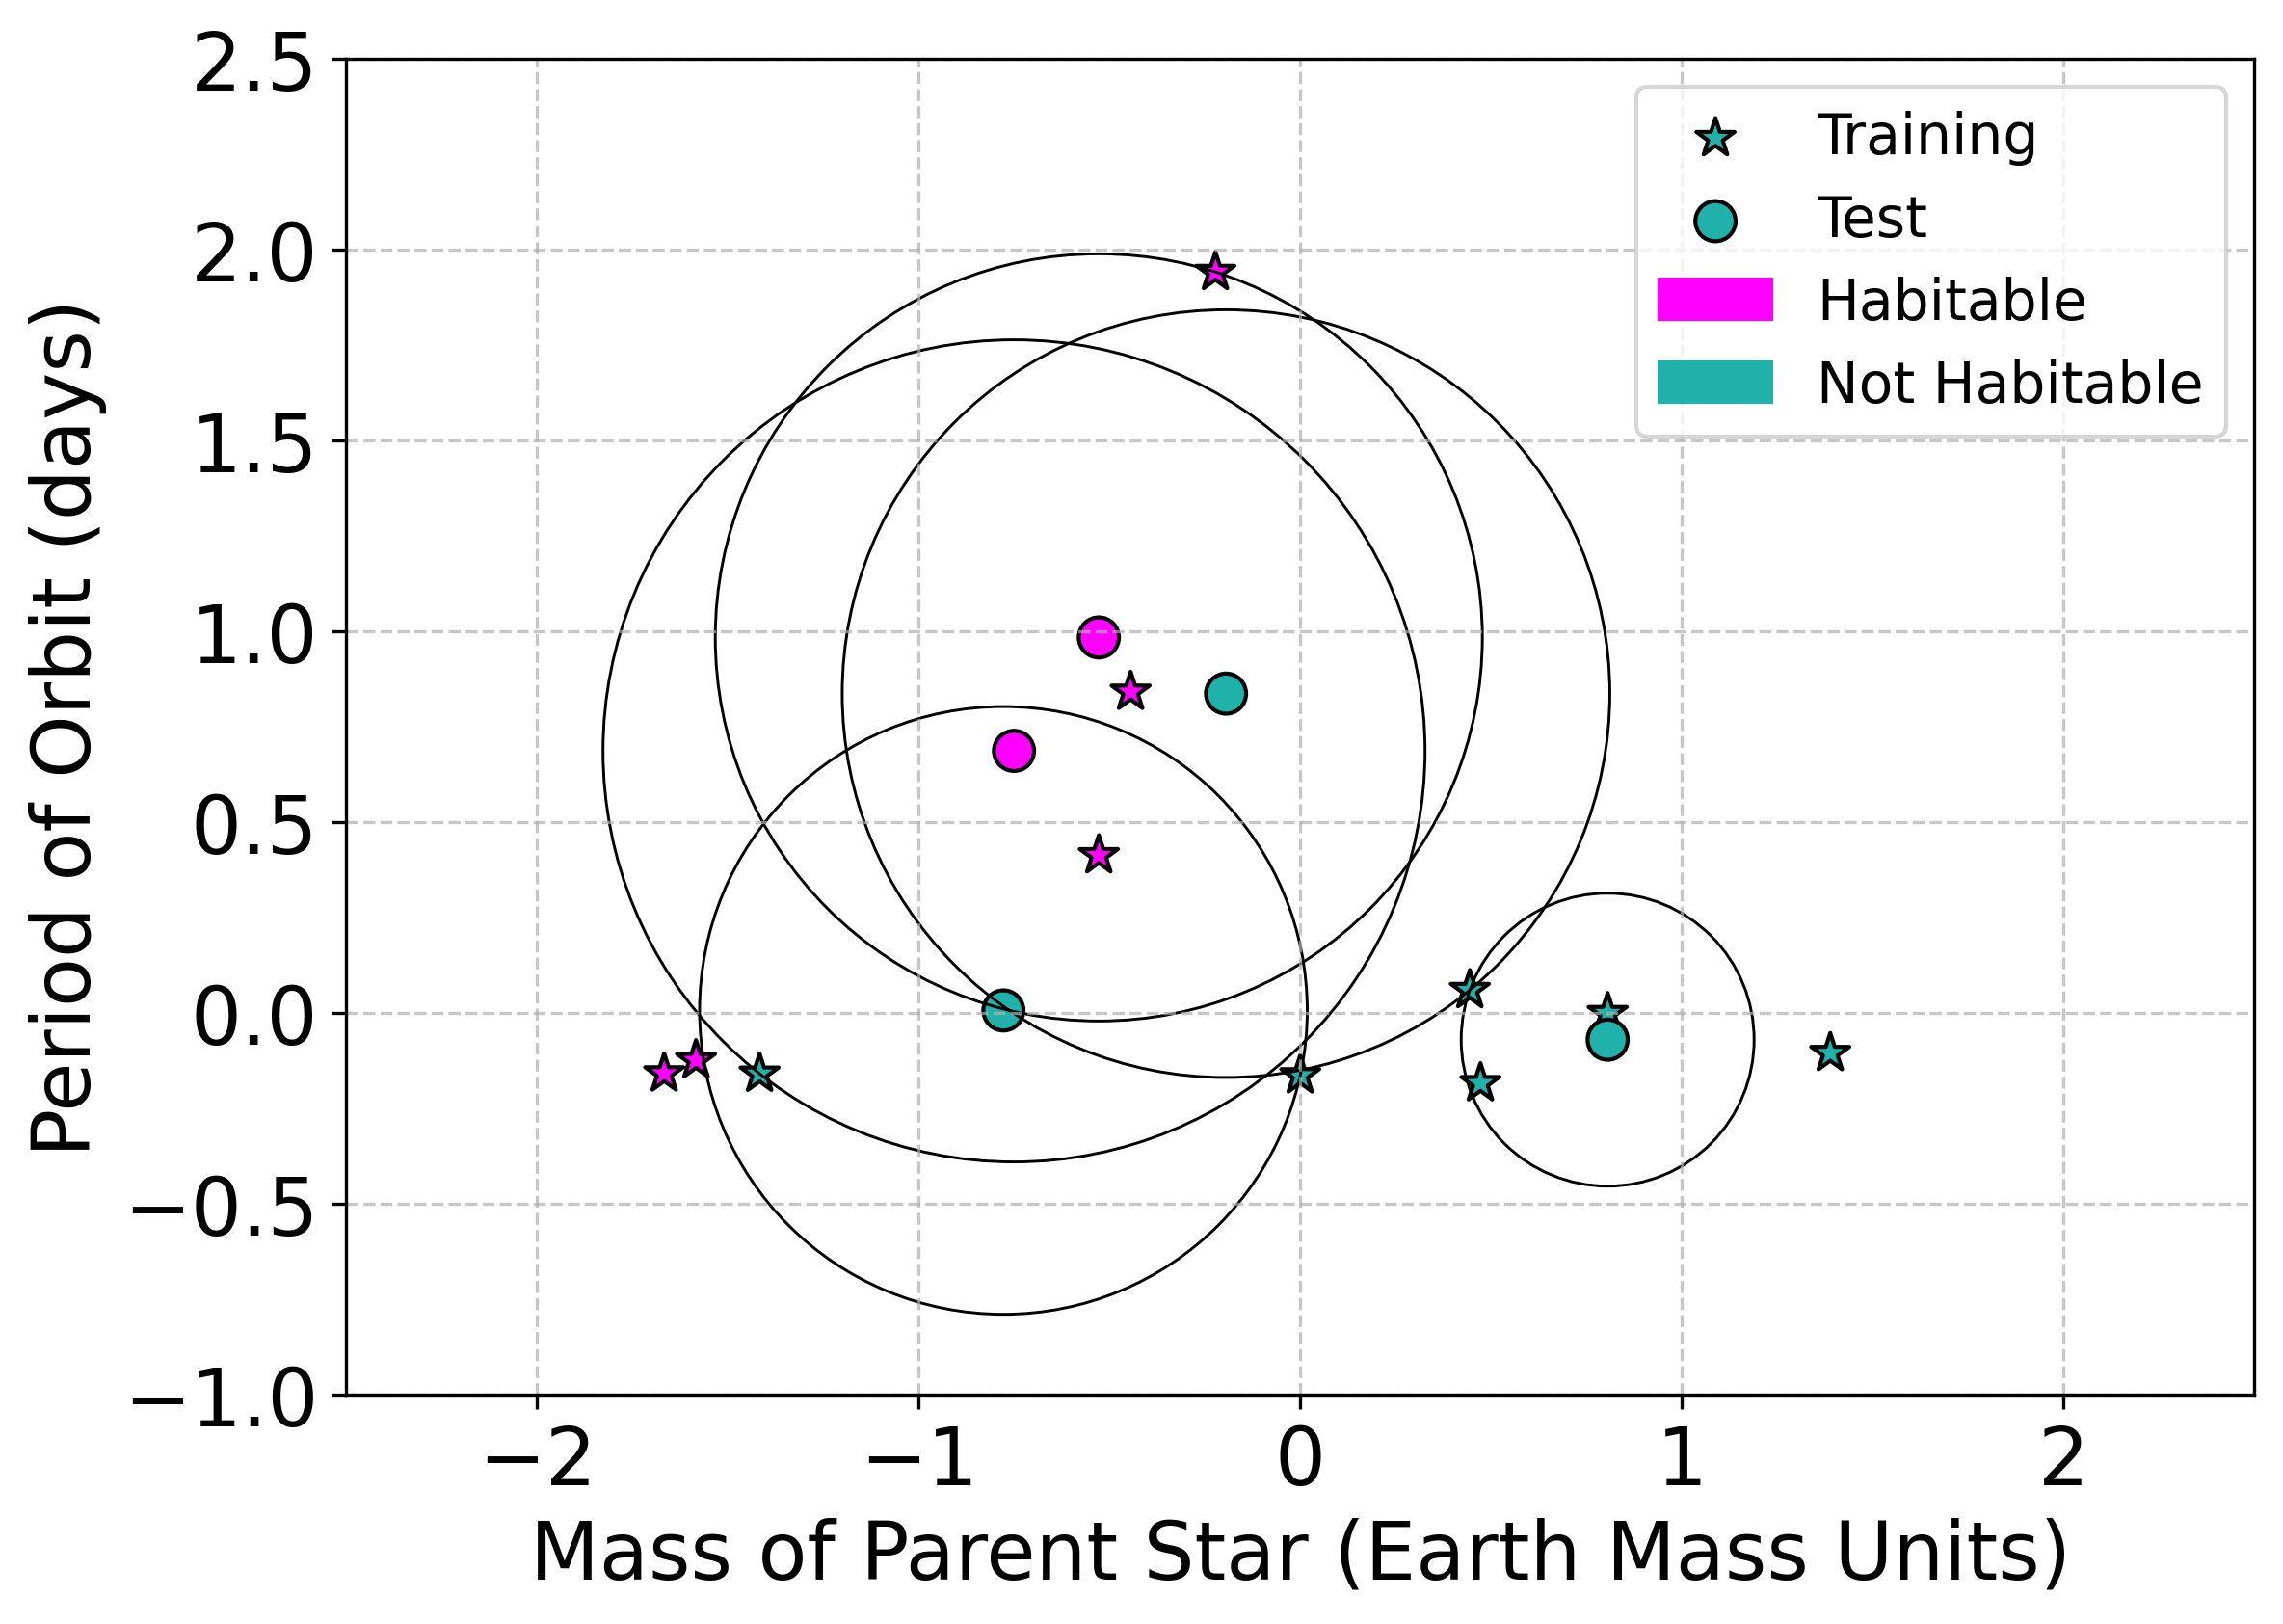

In [44]:
plt.figure(figsize=(10,6))#, aspect_ratio = 'equal')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
plt.scatter(scaledXTrain[:,0], scaledXTrain[:,1], marker = '*',\
            c = ytrain, s = 100, label = 'Train', cmap=cmap) #, 

plt.scatter(scaledXtest[:,0], scaledXtest[:,1], marker = 'o',\
            c = ytest, s = 100, label = 'Test', cmap=cmap) #label = ,

for i in range(len(TestSet)):
    circle1=plt.Circle((scaledXtest[i,0],scaledXtest[i,1]),model.kneighbors(scaledXtest[:,:2])[0][i,2],\
                       edgecolor='k',facecolor='none', lw = 0.7)
    plt.gca().add_artist(circle1)

plt.gca().set_aspect(1)

plt.legend();

ax = plt.gca()
# access the legend handles and labels
#modified: leg = ax.get_legend()
handles, labels = ax.get_legend_handles_labels()
# DEBUG: Print the handles and labels
#print("Handles:", handles)
#print("Labels:", labels)

# change the color of the handles, conform original code
##leg.legendHandles[0].set_facecolor('none')
#leg.legendHandles[1].set_color('k')
##leg.legendHandles[1].set_facecolor('none')
handles[0].set_color('k')
handles[0].set_label('Training')
#handles[0].set_facecolor('none')
handles[1].set_label('Test')
handles[1].set_color('k')
#handles[1].set_facecolor('none')


#modified: plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
#           loc = 'upper left', fontsize = 14)
plt.legend(handles=[handles[0],handles[1], magentapatch, bluepatch],
           loc = 'upper right', fontsize = 14)

# PP: add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Mass of Parent Star (Earth Mass Units)')
plt.ylabel('Period of Orbit (days)');


plt.xlim(-2.5,2.5)
plt.ylim(-1.,2.5);

plt.savefig('images/HabPlanetsKNN2scaled.png', dpi = 300)

### Note: for the purpose of application (not visualization), we should use all three features.

### Discussion questions:
    
We discovered that kNN needs scaling! Does DT have the same issue?

Any thoughts on strengths/weaknesses?